# Gaussian Mixture Models

This example uses Gaussian Mixture Models algorithm to generate and analyse Ground Truth data set. In order to do so, we've prepared a set of experiments which results are described below.

### Experiment description
In below experiment, we've collected 1319 rectangle annotations for 5 Scans with 156 Slices total. Labels were taken by 36 Users considered to be non-experts.

### Preparation
At the beginning, let's import the most important modules and classes from the MedTagger internal API.

In [1]:
from medtagger.database import models
from medtagger.ground_truth.algorithms.gaussian_mixture_models import GaussianMixtureModelsAlgorithm
from medtagger.ground_truth.generator import DataSetGenerator
from medtagger.ground_truth.quality import figures
from medtagger.ground_truth.quality.user_specificity_sensitivity import compute_specificity_and_sensitivity_for_users

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 8.0]

### Create Generator instance

To create Ground Truth data set, all you need is to define your data set generator and an algorithm that should be used during generation.

In [3]:
algorithm = GaussianMixtureModelsAlgorithm()
generator = DataSetGenerator(algorithm)

### Select Scans for analysis

Then, select all Scans that you would like to analyse.

In [4]:
scans = models.Scan.query.all()
scans_ids = {scan.id for scan in scans}
print(f'Scan IDs: {scans_ids}')

Scan IDs: {'03647f36-d874-480b-aaec-c2c3b9d80092', '40761156-99db-4647-9b72-8e449e6cb54c', 'b750320e-5664-4eff-b4c7-49e4f43ce6ca', '7985ea16-d5a4-4bda-92db-43a3cc074216', '8b5d264d-bc2f-458f-ba68-2a987d55deae'}


### Select Label Elements for analysis

Now, select all Label Elements that should be analysed.

**IMPORTANT:** Currently Data Set Generator assumes only one Label Element per Slice. Don't worry, this will change in the near future.

In [5]:
query = models.RectangularLabelElement.query.join(models.Label)
query = query.filter(models.Label.scan_id.in_(scans_ids))
rectangular_label_elements = query.all()
print(f'There are {len(rectangular_label_elements)} Rectangular Label Elements.')
print(f'Example: {rectangular_label_elements[0]}')

There are 1319 Rectangular Label Elements.
Example: <RectangularLabelElement: 6b7518c7-3d5c-408b-811c-a144e10b154c>


### Generate Ground Truth data set

Take your Label Elements and use generator to generate output Ground Truth annotations for each Slice that took part in the labeling process.

In [6]:
ground_truth = generator.generate(rectangular_label_elements)
ground_truth

{'5729e1e0-3b94-4f5a-a30a-ef350c9c4d52': array([0.26640885, 0.08379185, 0.43433193, 0.31795539]),
 '5e9a412e-cb11-4263-a82a-80c33189d67b': array([0.31104929, 0.37848228, 0.44950271, 0.60496599]),
 '8af2f340-8d5a-4c6d-83cd-d6feb73bd6f1': None,
 'b86b0921-13e7-46d5-a175-993023906ce0': None,
 '8dee6b36-3c8d-49d4-97a9-2b0618a4c53f': array([0.26518413, 0.0804198 , 0.43463202, 0.37057622]),
 'c4ae2a1c-5efb-4d52-9255-359392ae785b': array([0.37172691, 0.51974717, 0.43754703, 0.59801785]),
 '4ffe76fa-8d3a-4231-bde7-47f960f6b511': array([0.32117552, 0.43116715, 0.44472239, 0.62220259]),
 'e57240eb-f3d1-4e8e-bfd2-d36ec75d9c06': None,
 '08acc199-af16-4616-b078-26983db57d95': None,
 '832d679a-9d4d-49bf-b989-0e141bc9f7f9': None,
 'd8ac0033-e9da-4708-8172-08412b356679': array([0.31399798, 0.40525817, 0.44713081, 0.61766653]),
 '15e59c4f-af6e-49c0-8064-04c339bc633a': None,
 '1af01016-66bf-47f0-a811-53d86f0332ec': None,
 '813242bc-b802-47db-89ad-bcad1ec0042f': array([0.34422646, 0.52963716, 0.47891856,

### Check Users' Specificity and Sensitivity

MedTagger supports easy calculation of Users' Specificity, Sensitivity and Score based on their annotations and Ground Truth data set.

In [7]:
users = set(element.label.owner for element in rectangular_label_elements)
print(f'There are {len(users)} Users.')

There are 36 Users.


In [8]:
users_specificity, users_sensitivity, users_scores = compute_specificity_and_sensitivity_for_users(
    algorithm, users, rectangular_label_elements, ground_truth)

In [9]:
users_ids = set(e.label.owner_id for e in rectangular_label_elements)
for user_id in users_ids:
    print(f'User #{user_id:03d}: Sensitivity={users_sensitivity[user_id]:1.5f} '
          f'Specificity={users_specificity[user_id]:1.5f} Score={users_scores[user_id]:1.5f}')

User #001: Sensitivity=0.00000 Specificity=0.98649 Score=0.00018
User #003: Sensitivity=0.47561 Specificity=1.00000 Score=0.22620
User #005: Sensitivity=0.50000 Specificity=1.00000 Score=0.25000
User #025: Sensitivity=0.52439 Specificity=1.00000 Score=0.27499
User #031: Sensitivity=0.50000 Specificity=0.98649 Score=0.23667
User #033: Sensitivity=0.24390 Specificity=1.00000 Score=0.05949
User #034: Sensitivity=0.45122 Specificity=1.00000 Score=0.20360
User #035: Sensitivity=0.40244 Specificity=1.00000 Score=0.16196
User #036: Sensitivity=0.39024 Specificity=1.00000 Score=0.15229
User #037: Sensitivity=0.47561 Specificity=1.00000 Score=0.22620
User #039: Sensitivity=0.01220 Specificity=0.97297 Score=0.00022
User #040: Sensitivity=0.47561 Specificity=1.00000 Score=0.22620
User #041: Sensitivity=0.45122 Specificity=0.98649 Score=0.19159
User #042: Sensitivity=0.46341 Specificity=1.00000 Score=0.21475
User #043: Sensitivity=0.39024 Specificity=1.00000 Score=0.15229
User #044: Sensitivity=0.

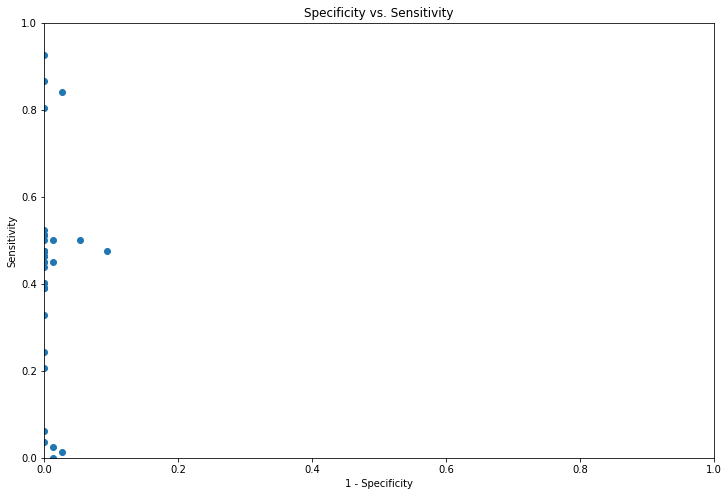

In [10]:
figures.specificity_vs_sensitivity(users_specificity, users_sensitivity)

### Compare Labeling Time to Users' Score

You can also check how User's mean Labeling Time outputs in their achieved scores.

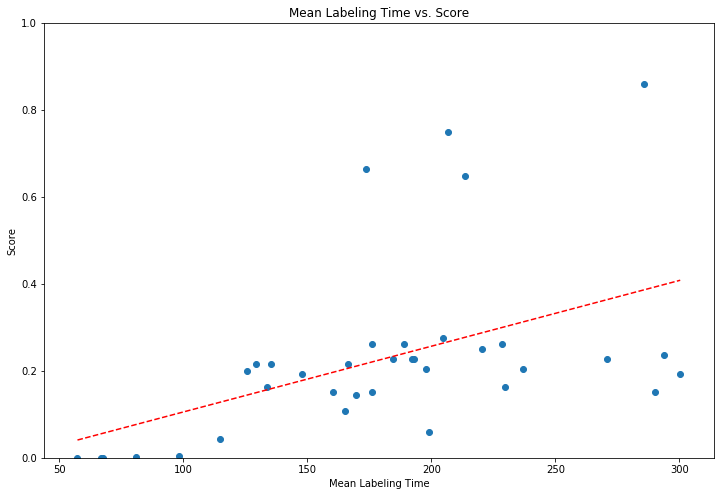

In [11]:
figures.mean_labeling_time_vs_score(rectangular_label_elements, users_scores)